# Performance (Initial)

### Preamble

In [1]:
SYS_PATH = r'C:/Users/mark/Documents/GitHub/honours/dev/package/'
SAVE_PATH = r"C:/Users/mark/Documents/GitHub/honours/submissions/thesis-original"
LOAD_PATH = r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/temp/output.db"

In [2]:
#standard imports
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
from datetime import date, timedelta
from collections import OrderedDict
import math
from itertools import chain
from datetime import date
from datetime import datetime

#third party imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn import metrics

In [3]:
import importlib
import sys; sys.path.append(SYS_PATH)
import analysis.helper as helper
importlib.reload(helper)
%matplotlib inline

In [4]:
plt.style.use(['seaborn-white', 'seaborn-paper'])

In [38]:
palette = ["#244397", "#3754A0", "#5F76B3", "#D3D3D3", "#E8CC77", "#DCAF2A", "#9a7a1d"] * 2#"colorblind"
TINY_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE  = 16, 24, 30, 36
rcParams['font.family'] = 'serif' 
rcParams['font.serif'] = 'CMU Serif' 
rcParams['font.weight'] = 'bold'
rcParams['figure.figsize'] = (12, 6) #(8,3)
pd.set_option('precision',3)

In [39]:
sns.set_palette(palette)
rcParams['font.size'] = SMALL_SIZE #default font size
rcParams['axes.titlesize'] =SMALL_SIZE   # fontsize of the axes title
rcParams['axes.labelsize'] =MEDIUM_SIZE    # fontsize of the x and y labels
rcParams['xtick.labelsize'] =SMALL_SIZE    # fontsize of the tick labels
rcParams['ytick.labelsize'] =SMALL_SIZE   # fontsize of the tick labels
rcParams['legend.fontsize'] =SMALL_SIZE    # legend fontsize
rcParams['figure.titlesize'] =BIGGER_SIZE  # fontsize of the figure title
outline_bars = dict(linewidth = 1.25, edgecolor = '.15')

### AU-PRC by imputation strategy

In [70]:
reload = True

In [71]:
chart_id = "figures/design/auc_imputer"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [72]:
def get_data():
    data = helper.get_results(16, "create")
    data = data[["PRC", "Imputer", "outcome_chance"]]
    return data

In [73]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [74]:
x = "PRC"
y = "Imputer"
order = data.groupby(y)[x].median().sort_values(ascending=False).index.tolist()
xlabel = "Area Under Precision-Recall Curve"
ylabel = "Imputer Strategy"
line = (data["outcome_chance"].ix[0], "Chance: {:.2f}".format(data["outcome_chance"].ix[0]))

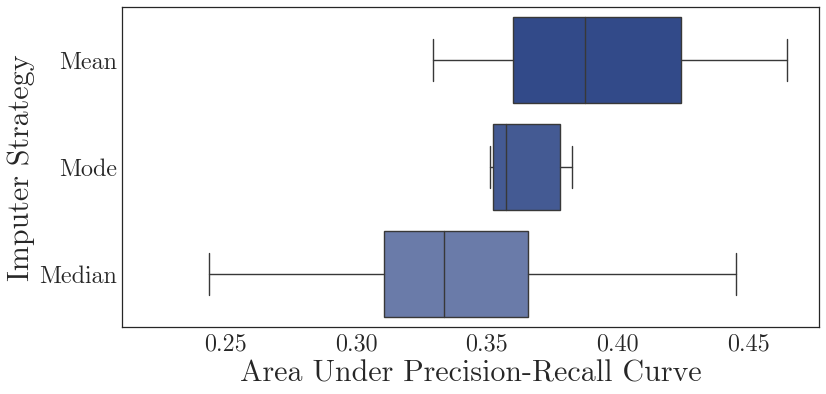

In [75]:
f = plt.figure()
ax = sns.boxplot(data=data, x=x, y=y, order=order, fliersize=0)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
#helper.add_vertical_line(ax, *line, color="r")
plt.tight_layout()

In [49]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### AU-PRC by transformation function

In [76]:
reload = True

In [77]:
chart_id = "figures/design/auc_transformer"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [78]:
def get_data():
    data = helper.get_results(16, "create")
    data = data[["PRC", "Transformer", "outcome_chance"]]
    return data

In [79]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [80]:
x = "PRC"
y = "Transformer"
order = data.groupby(y)[x].median().sort_values(ascending=False).index.tolist()
xlabel = "Area Under Precision-Recall Curve"
ylabel = "Transformer"
line = (data["outcome_chance"].ix[0], "Chance: {:.2f}".format(data["outcome_chance"].ix[0]))

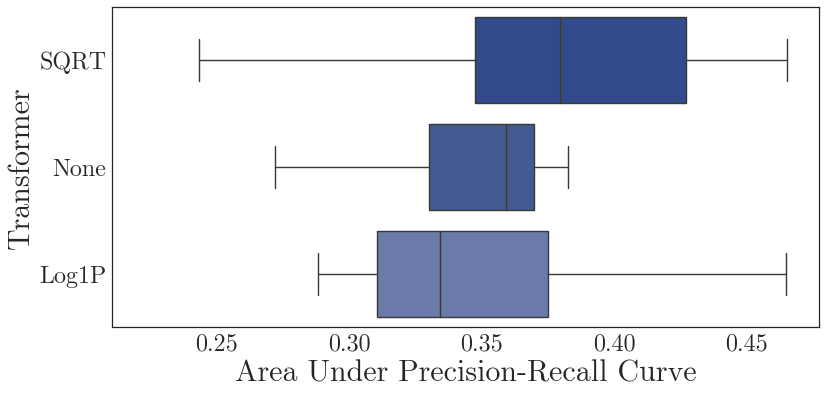

In [81]:
f = plt.figure()
ax = sns.boxplot(data=data, x=x, y=y, order=order, fliersize=0)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
#helper.add_vertical_line(ax, *line, color="r")
plt.tight_layout()

In [56]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### AU-PRC by scaling function

In [82]:
reload = True

In [83]:
chart_id = "figures/design/auc_scaler"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [84]:
def get_data():
    data = helper.get_results(16, "create")
    data = data[["PRC", "Scaler", "outcome_chance"]]
    return data

In [85]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [86]:
x = "PRC"
y = "Scaler"
order = data.groupby(y)[x].median().sort_values(ascending=False).index.tolist()
xlabel = "Area Under Precision-Recall Curve"
ylabel = "Scaler"
line = (data["outcome_chance"].ix[0], "Chance: {:.2f}".format(data["outcome_chance"].ix[0]))

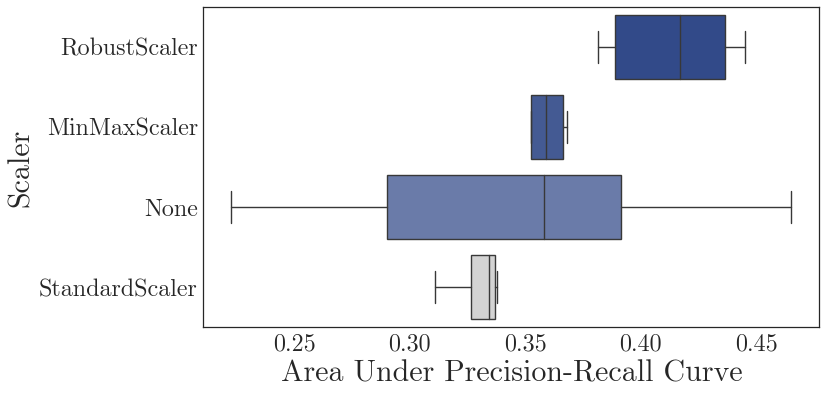

In [87]:
f = plt.figure()
ax = sns.boxplot(data=data, x=x, y=y, order=order, fliersize=0)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
#helper.add_vertical_line(ax, *line, color="r")
plt.tight_layout()

In [63]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### AU-PRC by extraction techniques

In [88]:
reload = True

In [89]:
chart_id = "figures/design/auc_extractor"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [90]:
def get_data():
    data = helper.get_results(16, "create")
    data = data[["PRC", "param_extractor__n_components_bin_20", "outcome_chance"]]
    data["PCA_Components"] = data["param_extractor__n_components_bin_20"].map({0 : "1-20", 1 : "21-40", 2: "41-60",3: "61-80", 4: "81-100"})
    return data

In [91]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [92]:
x = "PRC"
y = "PCA_Components"
order = data[y].value_counts().index.sort_values(ascending=True).tolist()
xlabel = "Area Under Precision-Recall Curve"
ylabel = "PCA Components"
line = (data["outcome_chance"].ix[0], "Chance: {:.2f}".format(data["outcome_chance"].ix[0]))

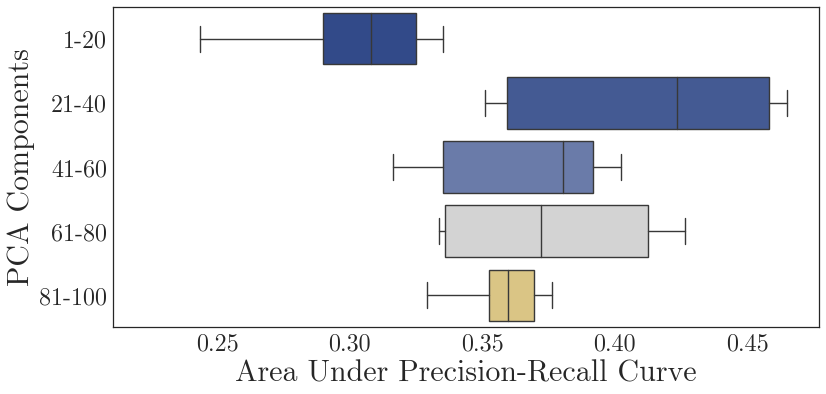

In [93]:
f = plt.figure()
ax = sns.boxplot(data=data, x=x, y=y, order=order, fliersize=0, orient="h")
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
#helper.add_vertical_line(ax, *line, color="r")
plt.tight_layout()

In [32]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### AU-PRC by classification algorithms

In [7]:
reload = True

In [8]:
chart_id = "figures/design/auc_classifier"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [9]:
def get_data():
    data = helper.get_results(16, "create")
    data = data[["PRC", "Classifier", "outcome_chance"]]
    return data

In [10]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [11]:
y = "Classifier"
"""
data[y] = data[y].map({
    "Logistic Regression": "LR",
    "Decision Tree": "DT",
    "Random Forest": "RF",
    "Naive Bayes": "NB",
    "K-Nearest Neighbors": "KNN",
    "Artificial Neural Network": "ANN",
    "Support Vector Machine": "SVM"
})"""

'\ndata[y] = data[y].map({\n    "Logistic Regression": "LR",\n    "Decision Tree": "DT",\n    "Random Forest": "RF",\n    "Naive Bayes": "NB",\n    "K-Nearest Neighbors": "KNN",\n    "Artificial Neural Network": "ANN",\n    "Support Vector Machine": "SVM"\n})'

In [12]:
x = "PRC"
y = "Classifier"
order = data.groupby(y)[x].median().sort_values(ascending=False).index.tolist()
xlabel = "Area Under Precision-Recall Curve"
ylabel = "Classifier"
line = (data["outcome_chance"].ix[0], "Chance: {:.2f}".format(data["outcome_chance"].ix[0]))

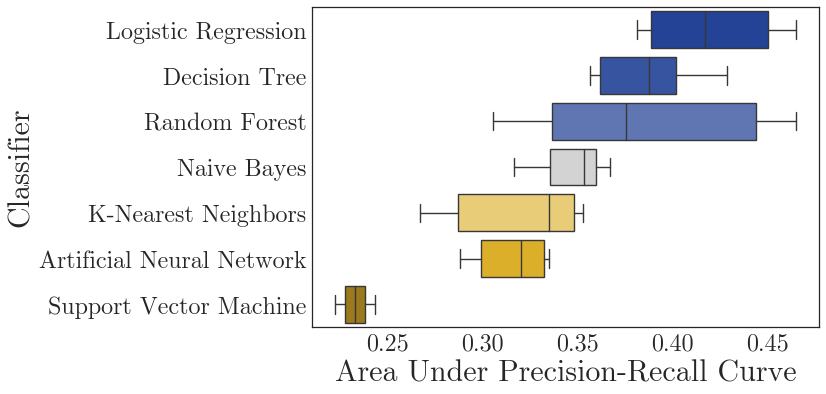

In [19]:
f = plt.figure()
ax = sns.boxplot(data=data, x=x, y=y, order=order, saturation =1, fliersize=0)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
#ax.set_xlim(xmin=0, xmax=0.5)
#helper.add_vertical_line(ax, *line, color="r")
plt.tight_layout()

In [40]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Statistics by classification algorithms

In [24]:
reload = False

In [25]:
chart_id = "figures/design/statistics_classifier"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [26]:
def get_data():
    data = helper.get_results(16, "create")
    data["ROC"] = data["ROC"].fillna(data['AUC'])
    data["MCC"] = data["MCC"].fillna(data['MC'])
    data["Total"] = "Total"
    data = data[["PRC", "ROC", "F1", "MCC", "Time", "Classifier", "Total"]]
    return data

In [27]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Learning Curve
Error: Target Outcome


In [28]:
columns = ["PRC", "ROC", "F1", "MCC", "Time"]
colnames = ["AUC PRC", "AUC ROC", "F1", "MCC", "Fit Time (s)"]
colfuncs = [
    OrderedDict([("50th", np.median),("Max", np.max)]), 
    OrderedDict([("50th", np.median),("Max", np.max)]), 
    OrderedDict([("50th", np.median),("Max", np.max)]), 
    OrderedDict([("50th", np.median),("Max", np.max)]), 
    OrderedDict([("50th", np.median),("75th", lambda x: np.nanpercentile(x,75))])]
namefunc = OrderedDict(zip(columns, colnames))
aggfunc = OrderedDict(zip(columns, colfuncs))

In [29]:
pivot1 = pd.pivot_table(data, values=columns, index="Classifier", aggfunc=aggfunc,  fill_value = 0,  margins=False)
pivot2 = pd.pivot_table(data, values=columns, index="Total", aggfunc=aggfunc, fill_value = 0, margins=False)
table = pd.concat([pivot1,pivot2],axis=0).rename(columns=namefunc)
table

AUC PRC        AUC ROC            F1           MCC  \
                             50th    Max    50th    Max   50th    Max   50th   
Artificial Neural Network   0.320  0.335   0.517  0.523  0.072  0.096  0.111   
Decision Tree               0.388  0.429   0.651  0.659  0.305  0.314  0.212   
K-Nearest Neighbors         0.335  0.353   0.532  0.565  0.131  0.226  0.137   
Logistic Regression         0.417  0.465   0.675  0.710  0.339  0.358  0.255   
Naive Bayes                 0.354  0.367   0.623  0.638  0.303  0.321  0.212   
Random Forest               0.376  0.465   0.619  0.709  0.332  0.360  0.271   
Support Vector Machine      0.233  0.244   0.503  0.504  0.014  0.017  0.038   
Total                       0.357  0.465   0.623  0.710  0.300  0.360  0.209   

                                 Fit Time (s)           
                             Max         50th     75th  
Artificial Neural Network  0.140        9.146   21.035  
Decision Tree              0.224       15.329   16.853  
K-Nearest Neighbors        0.210        8.537   20.778  
Logistic Regression        0.288        7.326  412.708  
Naive Bayes                0.239        8.589   26.804  
Random Forest              0.288       68.325   69.015  
Support Vector Machine     0.045       29.015   29.015  
Total                      0.288       15.329   29.015

In [30]:
output_path =  "{}/{}.tex".format(SAVE_PATH, chart_id)
table.to_latex(output_path)

### Pipeline performance by slice date

In [20]:
reload = True

In [21]:
chart_id = "figures/design/auc_finalists_agg"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [22]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(16, "select")
    data["feature_date_int"] = data["feature_date"].apply(lambda x: datetime(x.year, x.month, x.day).timestamp())
    data = data[["feature_date_int", "PRC", "outcome_chance"]]
    data.to_pickle(pickle_path)

In [30]:
y = "PRC"
x = "feature_date_int"
ylabel = "Area Under PR Curve"
xlabel = "Feature Slice Date"

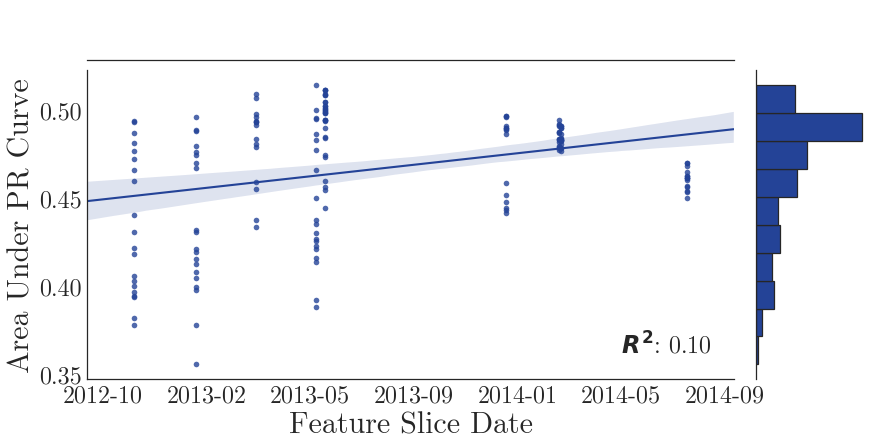

In [31]:
g = sns.JointGrid(data=data, x=x, y=y)
g = g.plot_joint(sns.regplot)
_ = g.ax_marg_y.hist(data[y],orientation="horizontal", **outline_bars)
g = g.annotate(lambda a, b: stats.pearsonr(a, b)[0] ** 2, template="{stat}: {val:.2f}",stat="$R^2$")
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
ax = plt.gca()
xticks_dates = [datetime.fromtimestamp(x).strftime('%Y-%m') for x in ax.get_xticks()]
_ = ax.set_xticklabels(xticks_dates)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

In [14]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
g.savefig(output_path, bbox_inches="tight")

### Overview of finalist pipeline performance

In [32]:
reload = True

In [33]:
chart_id = "figures/design/auc_finalists_rank"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [34]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(16, "select")
    data = data[["rank_create", "Classifier", "PRC", "outcome_chance"]]
    data = data[~np.isnan(data["rank_create"])]
    data.to_pickle(pickle_path)

In [35]:
x= "PRC"
y = "rank_create"
labels = data[[y,"Classifier"]].drop_duplicates().sort_values(by=y, ascending=True)["Classifier"].tolist()

In [36]:
create_order = data[y].value_counts().index.tolist()
select_order = data.groupby(y)[x].median().sort_values(ascending=False).index.tolist()
select_order = ["{:,.0f}".format(x) for x in select_order]

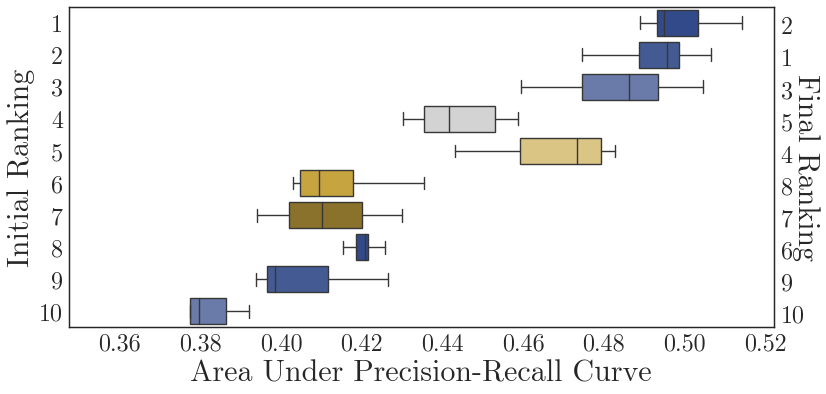

In [40]:
f = plt.figure()
ax = sns.boxplot(x=x, y=y, data=data, order=create_order, fliersize=0, orient="h")
ax.set_yticklabels(["{:,.0f}".format(ytick+1) for ytick in ax.get_yticks().tolist()])
ax2 = ax.twinx()
ax.set_xlabel("Area Under Precision-Recall Curve")
ax.set_ylabel("Initial Ranking")
ax2.set_ylabel("Final Ranking", labelpad=40, rotation=270)
ax2.set_yticklabels([])
helper.add_boxplot_labels(ax, select_order, size=SMALL_SIZE, color='.15')
#add_vertical_line(ax, df_select3["outcome_chance"].median(), "Chance", color="r")
#add_horizontal_line(ax, 5.5, "", color="black")
plt.tight_layout()

In [207]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")